 > 어떤 데이터가 들어왔다.<br>
 > 내가 알고있는 머신러닝은 다 돌려봐야 한다.
 

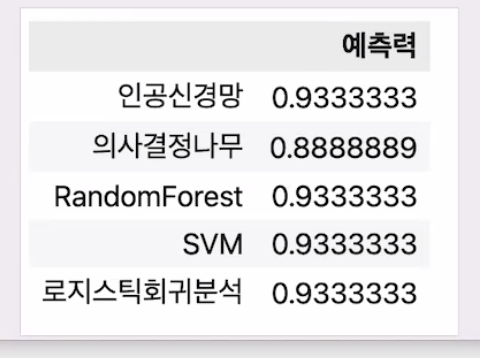

---
# 인공신경망

In [ ]:
library(caret)
library(nnet)
library(party)
library(randomForest)
library(e1071)

In [1]:
# 인공신경망 라이브러리
library(nnet)

In [2]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [10]:
# 표준화 작업하기
summary(iris)
iris2 <- as.data.frame(scale(iris[,-5]))
iris2$Species <- iris$Species
summary(iris2)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

  Sepal.Length       Sepal.Width       Petal.Length      Petal.Width     
 Min.   :-1.86378   Min.   :-2.4258   Min.   :-1.5623   Min.   :-1.4422  
 1st Qu.:-0.89767   1st Qu.:-0.5904   1st Qu.:-1.2225   1st Qu.:-1.1799  
 Median :-0.05233   Median :-0.1315   Median : 0.3354   Median : 0.1321  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.67225   3rd Qu.: 0.5567   3rd Qu.: 0.7602   3rd Qu.: 0.7880  
 Max.   : 2.48370   Max.   : 3.0805   Max.   : 1.7799   Max.   : 1.7064  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [12]:
# iris Sampling, 학습용, 검증용 만들기
set.seed(1234)

samp <- createDataPartition(iris2$Species, p=0.7, list=F)
data.tr <- iris2[samp,]
data.test <- iris2[-samp,]
x <- subset(data.test, select = -Species)
y <- data.test$Species
model.nnet <- nnet(Species ~ ., data=data.tr, size=3)
인pred <- predict(model.nnet, x, type = "class")
mean(인pred == y)
table(인pred, y)


# weights:  27
initial  value 124.913043 
iter  10 value 6.777899
iter  20 value 0.018147
final  value 0.000081 
converged


[1] 0.9333333

            y
인pred      setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          3        15

In [34]:
인공신경망 <- mean(인pred == y)

---
# 의사결정나무

In [15]:
library(party)

In [17]:
# iris Sampling, 학습용, 검증용 만들기
set.seed(1234)

samp <- createDataPartition(iris2$Species, p=0.7, list=F)
data.tr <- iris2[samp,]
data.test <- iris2[-samp,]
x <- subset(data.test, select = -Species)
y <- data.test$Species
model.ctree <- ctree(Species ~., data=data.tr)
의pred <- predict(model.ctree, x)
mean(의pred == y)
table(의pred, y)


[1] 0.8888889

            y
의pred      setosa versicolor virginica
  setosa         13          0         0
  versicolor      2         13         1
  virginica       0          2        14

In [33]:
의사결정나무 <- mean(의pred == y)

---
# RandomForest

In [21]:
library(randomForest)

In [22]:
# iris Sampling, 학습용, 검증용 만들기
set.seed(1234)

samp <- createDataPartition(iris2$Species, p=0.7, list=F)
data.tr <- iris2[samp,]
data.test <- iris2[-samp,]
x <- subset(data.test, select = -Species)
y <- data.test$Species
model.rf <- randomForest(Species ~ ., data=data.tr, ntree = 100)
Rpred <- predict(model.rf, x)
mean(Rpred == y)
table(Rpred, y)


[1] 0.9333333

            y
Rpred        setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          3        15

In [31]:
RandomForest <- mean(Rpred == y)

---
# SVM

In [24]:
library(e1071)

In [25]:
# iris Sampling, 학습용, 검증용 만들기
set.seed(1234)

samp <- createDataPartition(iris2$Species, p=0.7, list=F)
data.tr <- iris2[samp,]
data.test <- iris2[-samp,]
x <- subset(data.test, select = -Species)
y <- data.test$Species
model.svm <- svm(Species ~ . , data=data.tr)
Spred <- predict(model.svm, x)
mean(Spred == y)
table(Spred, y)


[1] 0.9333333

            y
Spred        setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         1
  virginica       0          2        14

In [30]:
SVM <- mean(Spred == y)

---
# 로지스틱 회귀분석


In [27]:
library(nnet)

In [28]:
# iris Sampling, 학습용, 검증용 만들기
set.seed(1234)

samp <- createDataPartition(iris2$Species, p=0.7, list=F)
data.tr <- iris2[samp,]
data.test <- iris2[-samp,]
x <- subset(data.test, select = -Species)
y <- data.test$Species
model <- multinom(Species ~., data=data.tr)
로pred <- predict(model, x)
mean(로pred == y)
table(로pred, y)

# weights:  18 (10 variable)
initial  value 115.354290 
iter  10 value 7.556637
iter  20 value 0.042347
iter  30 value 0.009210
iter  40 value 0.006761
iter  50 value 0.003904
iter  60 value 0.003512
iter  70 value 0.003095
iter  80 value 0.002826
iter  90 value 0.002781
iter 100 value 0.002705
final  value 0.002705 
stopped after 100 iterations


[1] 0.9333333

            y
로pred      setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         1
  virginica       0          2        14

In [35]:
로지스틱회귀분석 <- mean(로pred == y)

In [55]:

samp <- createDataPartition(iris2$Species, p=0.7, list=F)
data.tr <- iris2[samp,]
data.test <- iris2[-samp,]
x <- subset(data.test, select = -Species)
y <- data.test$Species

model.nnet <- nnet(Species ~ ., data=data.tr, size=3)
model.ctree <- ctree(Species ~., data=data.tr)
model.rf <- randomForest(Species ~ ., data=data.tr, ntree = 100)
model.svm <- svm(Species ~ . , data=data.tr)
model <- multinom(Species ~., data=data.tr)

인pred <- predict(model.nnet, x, type = "class")
의pred <- predict(model.ctree, x)
Rpred <- predict(model.rf, x)
Spred <- predict(model.svm, x)
로pred <- predict(model, x)

인공신경망 <-  mean(인pred == y)
의사결정나무 <- mean(의pred == y)
RandomForest <- mean(Rpred == y)
SVM <- mean(Spred == y)
로지스틱회귀분석 <- mean(로pred == y)

paste("인공신경망 :", 인공신경망)
paste("의사결정나무 :", 의사결정나무)
paste("RandomForest :", RandomForest)
paste("SVM :", SVM)
paste("로지스틱회귀분석 :", 로지스틱회귀분석)




#table(인pred, y)
#table(의pred, y)
#table(Rpred, y)
#table(Spred, y)
#table(로pred, y)

# weights:  27
initial  value 120.789937 
iter  10 value 2.949365
iter  20 value 0.226481
iter  30 value 0.000478
final  value 0.000047 
converged
# weights:  18 (10 variable)
initial  value 115.354290 
iter  10 value 7.228330
iter  20 value 2.359111
iter  30 value 1.731081
iter  40 value 1.125277
iter  50 value 1.111730
iter  60 value 0.925406
iter  70 value 0.714779
iter  80 value 0.700364
iter  90 value 0.681824
iter 100 value 0.675072
final  value 0.675072 
stopped after 100 iterations


[1] "인공신경망 : 0.911111111111111"

[1] "의사결정나무 : 0.955555555555556"

[1] "RandomForest : 0.933333333333333"

[1] "SVM : 0.933333333333333"

[1] "로지스틱회귀분석 : 0.933333333333333"

Resample1
4
8
10
11
12
13
14
15
16
17
